In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split

classes = [ "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge",
           "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair","chimpanzee","clock", "cloud", "cockroach",
           "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
           "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree",
           "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
           "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray",
           "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake",
           "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone",
           "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale",
           "willow_tree", "wolf", "woman", "worm" ]

In [12]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized


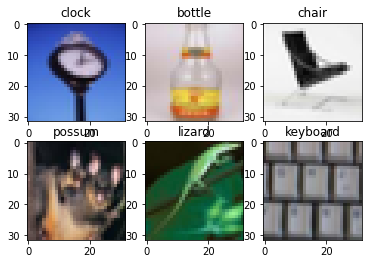

(40000, 32, 32, 3)
(40000,)
(10000, 32, 32, 3)
(10000,)
(10000, 32, 32, 3)
(10000,)


In [13]:
cifar= tf.keras.datasets.cifar100

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
train_images,val_images,train_labels,val_labels = train_test_split(train_images, train_labels, test_size = 0.2)

train_labels = train_labels.reshape(-1,)
val_labels = val_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(classes[train_labels[i]])
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(val_images.shape)
print(val_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  ### Pretrained Model







In [14]:
resnet_model = ResNet50(
    include_top = False,
    weights = 'imagenet',
    classes=100,
    input_shape = (224,224,3)
)
for layer in resnet_model.layers:
        layer.trainable=False 
        
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(resnet_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='softmax'))


In [15]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
result=model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,validation_data = (val_images, val_labels),)



Epoch 1/10
625/625 [==============================] - 70s 108ms/step - loss: 1.9735 - accuracy: 0.4884 - val_loss: 1.4981 - val_accuracy: 0.5796
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 1.3618 - accuracy: 0.6158 - val_loss: 1.3873 - val_accuracy: 0.6113
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 1.2042 - accuracy: 0.6543 - val_loss: 1.3199 - val_accuracy: 0.6266
Epoch 4/10
625/625 [==============================] - 67s 108ms/step - loss: 1.1059 - accuracy: 0.6765 - val_loss: 1.3297 - val_accuracy: 0.6295
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 1.0215 - accuracy: 0.6979 - val_loss: 1.3339 - val_accuracy: 0.6260
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.9753 - accuracy: 0.7093 - val_loss: 1.3212 - val_accuracy: 0.6323
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.9139 - accuracy: 0.7253 - val_loss: 1.3103 - val_ac

In [16]:
# test_images=test_images.reshape(224,224,3)
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

157/157 [==============================] - 14s 87ms/step - loss: 1.3263 - accuracy: 0.6475
Accuracy :  0.6474999785423279


### Predicting 

16/16 [==============================] - 1s 44ms/step
65
Prediction :  rabbit
Actual     :  rabbit


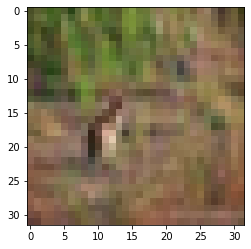

In [40]:
cnt =random.randint(100)
tempArr=[]
test_images=test_images[:500]
test_images.shape
predictions=model.predict(test_images)

pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print(label0)
print("Prediction : ",classes[label0])
print("Actual     : ",classes[test_labels[cnt]])


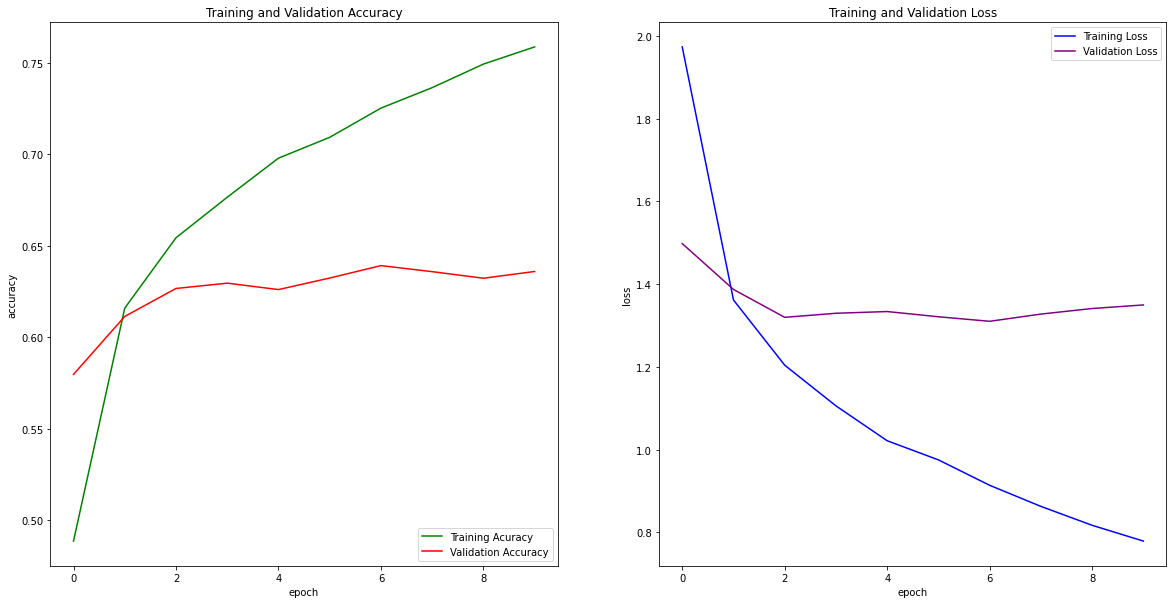

In [18]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Accuracy")
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(loss,color = 'blue',label = 'Training Loss')
plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()




313/313 [==============================] - 14s 45ms/step


<AxesSubplot:>

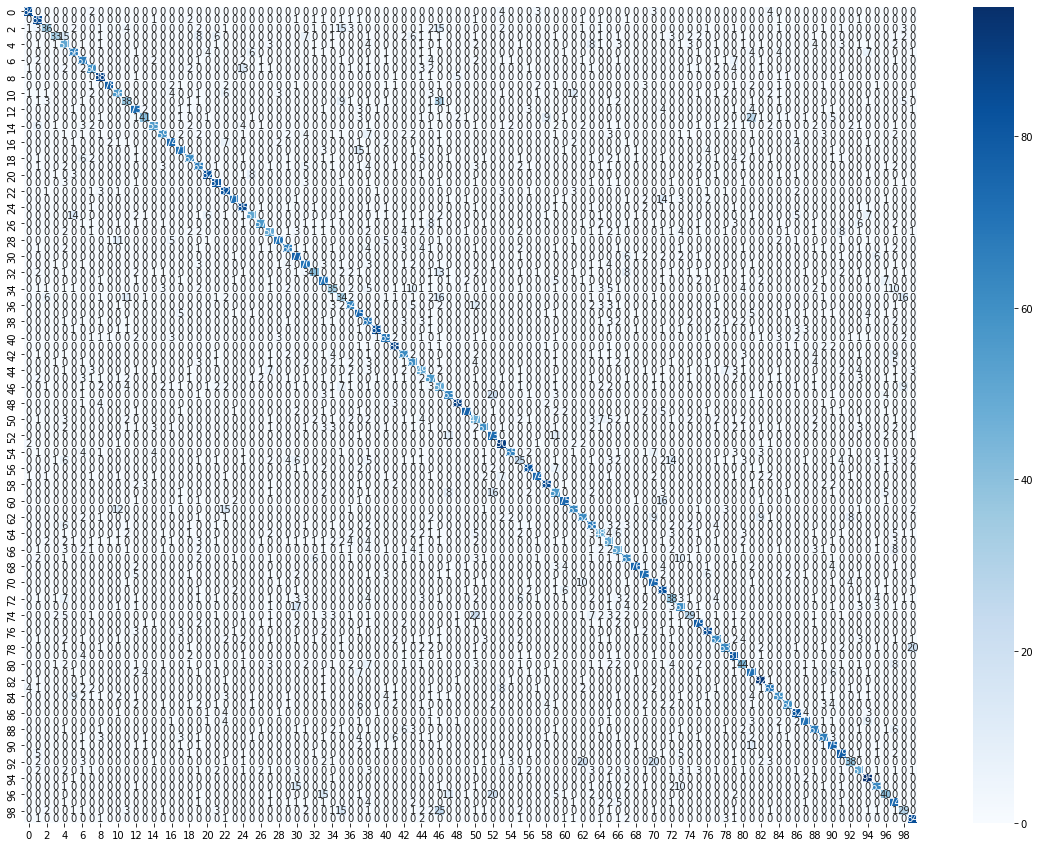

In [43]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
y_pred = np.argmax(model.predict(test_images), axis=1)

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=range(100), index=range(100))
plt.figure(figsize=(20,15))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")